# Indirect optimal control of nondimensional inverted pendulum via Pontryagin's minimum principle

In [1]:
from sympy import *
import numpy as np
from scipy.optimize import newton, fsolve
import matplotlib.pyplot as plt
init_printing()

# State variables

In [2]:
x, v, theta, omega = symbols("x v \\theta, \\omega")
s = Matrix([x, v, theta, omega])
s.T

## Control variable

In [3]:
u, us = symbols("u \overline{u}")
u, us

## State equations of motion

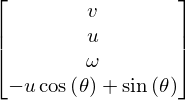

In [4]:
ds = Matrix([v, u, omega, sin(theta) - u*cos(theta)])
ds

## Homotopic Lagrangian

In [5]:
alpha = symbols("alpha")
L = (1-alpha)*u**2 + alpha*1
L

## Costate variables

In [6]:
l = Matrix([symbols("\\lambda_{}".format(var)) for var in s])
l.T

## Hamiltonian

In [7]:
H = L + l.dot(ds)
H

## Costate equations of motion

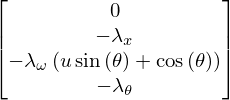

In [8]:
dl = -H.diff(s)
dl

## Energy optimal control $\alpha \in [0,1)$

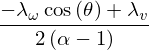

In [9]:
uo = solve(H.diff(u), u)[0]
uo

## Time optimal control $\alpha = 1$

In [10]:
uto = sign(limit(uo, alpha, 1))*us
uto

In [11]:
def ec_tt(tt, tr, kx, kv, kt, kw, um):
    xm = np.pi**2*(np.pi+um)
    vm = np.pi*um
    res = kt*(tt-tr) + np.sin(tt) - vm*np.cos(tt)
    res += kt*np.arctan(kx*xm + kv*vm)
    return res

-6.048010111668313
0.2351751955112731
6.518360502690857


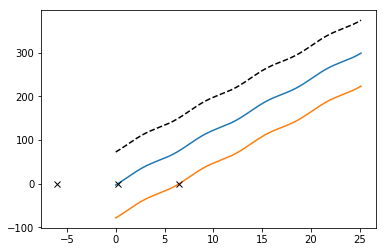

In [12]:
fig, ax = plt.subplots(1)
tt = np.linspace(0, 8*np.pi, 1000)
for tr in [-2*np.pi, 0, 2*np.pi]:
    fun = lambda tt: ec_tt(tt, tr, 0, 0, 12, 1, 1)
    res = newton(fun, 0)
    print(res)
    if tr == -2*np.pi:
        ax.plot(tt, fun(tt), "k--")
    else:
        ax.plot(tt, fun(tt))
    ax.plot(res, 0, "kx")

In [34]:
tr, kx, kv, kt, kw, um = symbols('\\theta_r k_x k_v k_\\theta k_\\omega u_m')
tt = symbols("\\tilde{\\theta}", positive=True)

In [35]:
xm = pi**2*(pi+um)
vm = pi*um
res = kt*(tt-tr) + sin(tt) - vm*cos(tt)
res += kt*atan(kx*xm + kv*vm)

In [39]:
print(latex(res))

k_\theta \left(- \theta_r + \tilde{\theta}\right) + k_\theta \operatorname{atan}{\left (\pi k_{v} u_{m} + \pi^{2} k_{x} \left(u_{m} + \pi\right) \right )} - \pi u_{m} \cos{\left (\tilde{\theta} \right )} + \sin{\left (\tilde{\theta} \right )}


In [16]:
%%matplotlib

UsageError: Cell magic `%%matplotlib` not found (But line magic `%matplotlib` exists, did you mean that instead?).


In [33]:
u = kt*(theta-tr) + kw*omega + sin(theta) + kt*atan(kx*x + kv*v)
u /= cos(theta)
print(latex(simplify(u)))

\frac{\omega k_\omega + k_\theta \left(\theta - \theta_r\right) + k_\theta \operatorname{atan}{\left (k_{v} v + k_{x} x \right )} + \sin{\left (\theta \right )}}{\cos{\left (\theta \right )}}


In [ ]:
print(latex(simplify(H.subs(alpha, 0))))

In [ ]:
print(latex(simplify(uo.subs(alpha, 0))))

In [ ]:
print(latex(simplify(dl)))